# Linear regression example

In [183]:
# Import PySpark and create a SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("ImportData").getOrCreate()

In [184]:
spark

# Ler o ficheiro

In [185]:
# Read a CSV file and create a DataFrame
df_btc=spark.read.option("header","true").csv('./data/btc1h_usdt.csv',inferSchema=True)

In [186]:
df_btc.columns

['_c0',
 'open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_vol',
 'trades',
 'taker_buy_base',
 'taker_buy_quote',
 'ignore',
 'symbol',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_vwap',
 'volume_mfi',
 'volume_nvi',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_kchi',
 'volatility_kcli',
 'volatility_dcl',
 'volatility_dch',
 'volatility_dcm',
 'volatility_dcw',
 'volatility_dcp',
 'volatility_atr',
 'volatility_ui',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'trend_sma_fast',
 'trend_sma_slow',
 'trend_ema_fast',
 'trend_ema_slow',
 'trend_vortex_ind_pos',
 'trend_vortex_ind_neg',
 'trend_vortex_ind_diff',
 'trend_trix',
 'trend_mass_index',
 'trend_dpo',
 'trend_kst',
 't

In [187]:
features =  ['open_time', 'open', 'high', 'low', 'close', 'volume', 'trades', 'volume_obv', 'trend_ema_fast', 'trend_ema_slow', 'momentum_rsi', 'momentum_stoch_rsi', 'others_cr', 'morningstar', 
             'hammer', 'piercing', '3soldiers', 'engulfing', 'ema200', 'ema50', 'slope', 'slope_obv']

In [188]:
df_btc[features].show(10,truncate=4)

+---------+----+----+----+-----+------+------+----------+--------------+--------------+------------+------------------+---------+-----------+------+--------+---------+---------+------+-----+-----+---------+
|open_time|open|high| low|close|volume|trades|volume_obv|trend_ema_fast|trend_ema_slow|momentum_rsi|momentum_stoch_rsi|others_cr|morningstar|hammer|piercing|3soldiers|engulfing|ema200|ema50|slope|slope_obv|
+---------+----+----+----+-----+------+------+----------+--------------+--------------+------------+------------------+---------+-----------+------+--------+---------+---------+------+-----+-----+---------+
|     2...|4...|4...|4...| 4...|  4...|  1...|      4...|          NULL|          NULL|        NULL|              NULL|      0.0|          0|     0|       0|        0|        0|  4...| 4...| NULL|     NULL|
|     2...|4...|4...|4...| 4...|  2...|  1...|      7...|          NULL|          NULL|        NULL|              NULL|     0...|          0|     0|       0|        0|     

In [189]:
df_btc[features].head(5)

[Row(open_time=datetime.datetime(2017, 8, 17, 4, 0), open=4261.48, high=4313.62, low=4261.32, close=4308.83, volume=47.181009, trades=171.0, volume_obv=47.181009, trend_ema_fast=None, trend_ema_slow=None, momentum_rsi=None, momentum_stoch_rsi=None, others_cr=0.0, morningstar=0, hammer=0, piercing=0, 3soldiers=0, engulfing=0, ema200=4308.83, ema50=4308.83, slope=None, slope_obv=None),
 Row(open_time=datetime.datetime(2017, 8, 17, 5, 0), open=4308.83, high=4328.69, low=4291.37, close=4315.32, volume=23.234916, trades=102.0, volume_obv=70.415925, trend_ema_fast=None, trend_ema_slow=None, momentum_rsi=None, momentum_stoch_rsi=None, others_cr=0.150620934221113, morningstar=0, hammer=0, piercing=0, 3soldiers=0, engulfing=0, ema200=4308.894577114427, ema50=4309.084509803922, slope=None, slope_obv=None),
 Row(open_time=datetime.datetime(2017, 8, 17, 6, 0), open=4330.29, high=4345.45, low=4309.37, close=4324.35, volume=7.229691, trades=36.0, volume_obv=77.645616, trend_ema_fast=None, trend_ema_

In [190]:
df_btc[features].tail(5)

[Row(open_time=datetime.datetime(2024, 4, 26, 9, 0), open=64412.5, high=64581.52, low=64329.42, close=64461.98, volume=824.2268, trades=29675.0, volume_obv=-15664.386139999991, trend_ema_fast=64403.29910594607, trend_ema_slow=64427.77774780465, momentum_rsi=50.62712018277325, momentum_stoch_rsi=0.5124626100142413, others_cr=1.9085368147904849, morningstar=0, hammer=0, piercing=0, 3soldiers=0, engulfing=0, ema200=65018.74420808611, ema50=64652.930054761484, slope=-12.665363453868865, slope_obv=351.86520951514956),
 Row(open_time=datetime.datetime(2024, 4, 26, 10, 0), open=64474.99, high=64556.45, low=64059.8, close=64068.76, volume=1188.39426, trades=38882.0, volume_obv=-16823.755649999992, trend_ema_fast=64353.5251606526, trend_ema_slow=64402.07615880403, momentum_rsi=42.88285574112114, momentum_stoch_rsi=0.0, others_cr=1.286891701712789, morningstar=0, hammer=0, piercing=0, 3soldiers=0, engulfing=-100, ema200=65009.29162890118, ema50=64630.021425162995, slope=-12.859812658885565, slop

In [191]:
df_btc.count()

58534

# Feature next hour

In [192]:
from pyspark.sql.functions import lag
from pyspark.sql import Window

windowSpec = Window.orderBy("open_time") 
df_btc = df_btc.withColumn("next_hour_close", lag("close", 1).over(windowSpec))


In [193]:
df_btc[features+['next_hour_close']].show(10,truncate=10)

24/04/27 13:08:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-------+-------+-------+-------+---------+------+----------+--------------+--------------+------------+------------------+----------+-----------+------+--------+---------+---------+----------+----------+----------+----------+---------------+
| open_time|   open|   high|    low|  close|   volume|trades|volume_obv|trend_ema_fast|trend_ema_slow|momentum_rsi|momentum_stoch_rsi| others_cr|morningstar|hammer|piercing|3soldiers|engulfing|    ema200|     ema50|     slope| slope_obv|next_hour_close|
+----------+-------+-------+-------+-------+---------+------+----------+--------------+--------------+------------+------------------+----------+-----------+------+--------+---------+---------+----------+----------+----------+----------+---------------+
|2017-08...|4261.48|4313.62|4261.32|4308.83|47.181009| 171.0| 47.181009|          NULL|          NULL|        NULL|              NULL|       0.0|          0|     0|       0|        0|        0|   4308.83|   4308.83|      NULL|      NULL| 

Its giving a partition problem:
* creating new variable year
* use it as partition

In [194]:
from pyspark.sql.functions import year
df_btc = df_btc.withColumn("year",year(df_btc.open_time))


In [195]:
winSpecPartition = Window.partitionBy("year")

In [196]:
#df_btc[features+['next_hour_close','year']].orderBy(winSpecPartition).show(10,truncate=10)

# Feature up down

In [197]:
df_btc = df_btc.withColumn("price_change", df_btc.next_hour_close - df_btc.close)
from pyspark.sql.functions import when

df_btc = df_btc.withColumn("next_hour_direction", 
                           when(df_btc.price_change > 0, 2)
                           .when(df_btc.price_change < 0, 1)
                           .otherwise(0)) 

In [198]:
df_btc[features+['next_hour_close','next_hour_direction']].show(20,truncate=8)

24/04/27 13:08:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------+-------+-------+-------+-------+--------+------+----------+--------------+--------------+------------+------------------+---------+-----------+------+--------+---------+---------+--------+--------+--------+---------+---------------+-------------------+
|open_time|   open|   high|    low|  close|  volume|trades|volume_obv|trend_ema_fast|trend_ema_slow|momentum_rsi|momentum_stoch_rsi|others_cr|morningstar|hammer|piercing|3soldiers|engulfing|  ema200|   ema50|   slope|slope_obv|next_hour_close|next_hour_direction|
+---------+-------+-------+-------+-------+--------+------+----------+--------------+--------------+------------+------------------+---------+-----------+------+--------+---------+---------+--------+--------+--------+---------+---------------+-------------------+
| 2017-...|4261.48|4313.62|4261.32|4308.83|47.18...| 171.0|  47.18...|          NULL|          NULL|        NULL|              NULL|      0.0|          0|     0|       0|        0|        0| 4308.83| 4308.83|

# Data exploration

In [199]:
df_btc.cache()
df_btc.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- open_time: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- close_time: timestamp (nullable = true)
 |-- quote_vol: double (nullable = true)
 |-- trades: double (nullable = true)
 |-- taker_buy_base: double (nullable = true)
 |-- taker_buy_quote: double (nullable = true)
 |-- ignore: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- volume_adi: double (nullable = true)
 |-- volume_obv: double (nullable = true)
 |-- volume_cmf: double (nullable = true)
 |-- volume_fi: double (nullable = true)
 |-- volume_em: double (nullable = true)
 |-- volume_sma_em: double (nullable = true)
 |-- volume_vpt: double (nullable = true)
 |-- volume_vwap: double (nullable = true)
 |-- volume_mfi: double (nullable = true)
 |-- volume_nvi: double (nullable = true)
 |-- volatility_b

24/04/27 13:08:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Perform descriptive analytics

In [200]:
df_btc[features+['next_hour_close','next_hour_direction']].describe().toPandas().transpose()

24/04/27 13:08:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


24/04/27 13:08:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , open_time, open, high, low, close, volume, close_time, quote_vol, trades, taker_buy_base, taker_buy_quote, ignore, symbol, volume_adi, volume_obv, volume_cmf, volume_fi, volume_em, volume_sma_em, volume_vpt, volume_vwap, volume_mfi, volume_nvi, volatility_bbm, volatility_bbh, volatility_bbl, volatility_bbw, volatility_bbp, volatility_bbhi, volatility_bbli, volatility_kcc, volatility_kch, volatility_kcl, volatility_kcw, volatility_kcp, volatility_kchi, volatility_kcli, volatility_dcl, volatility_dch, volatility_dcm, volatility_dcw, volatility_dcp, volatility_atr, volatility_ui, trend_macd, trend_macd_signal, trend_macd_diff, trend_sma_fast, trend_sma_slow, trend_ema_fast, trend_ema_slow, trend_vortex_ind_pos, trend_vortex_ind_neg, trend_vortex_ind_diff, trend_trix, trend_mass_index, trend_dpo, trend_kst, trend_kst_sig, trend_kst_diff, trend_ichimoku_conv, trend_ichimoku_base, trend_ichimoku_a,

,0,1,2,3,4
summary,count,mean,stddev,min,max
open,58534,22597.89833703482,17434.59525675311,2870.9,73577.35
high,58534,22711.09496873599,17520.709119306746,2950.0,73777.0
low,58534,22477.920672600027,17343.207681038137,2817.0,73215.14
close,58534,22598.823057368194,17435.044549682436,2919.0,73522.71
volume,58534,3002.890417015487,4260.28315520328,0.052699,137207.1886
trades,58534,60959.768066422934,91180.31963362783,3.0,1442097.0
volume_obv,58534,329883.5466520245,446934.11639938987,-529998.6934169969,1269231.045363004
trend_ema_fast,58523,22596.6940183804,17427.681187579707,3139.06562729236,73167.80371278503
trend_ema_slow,58509,22593.881159754008,17418.46668150921,3217.608110013814,72938.38424465033


Scatter matrix to detect early correlations

In [201]:
df_btc.dtypes[1][0]

'open_time'

In [202]:
df_analysis = df_btc[features+['next_hour_close','next_hour_direction']]

24/04/27 13:08:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:08:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


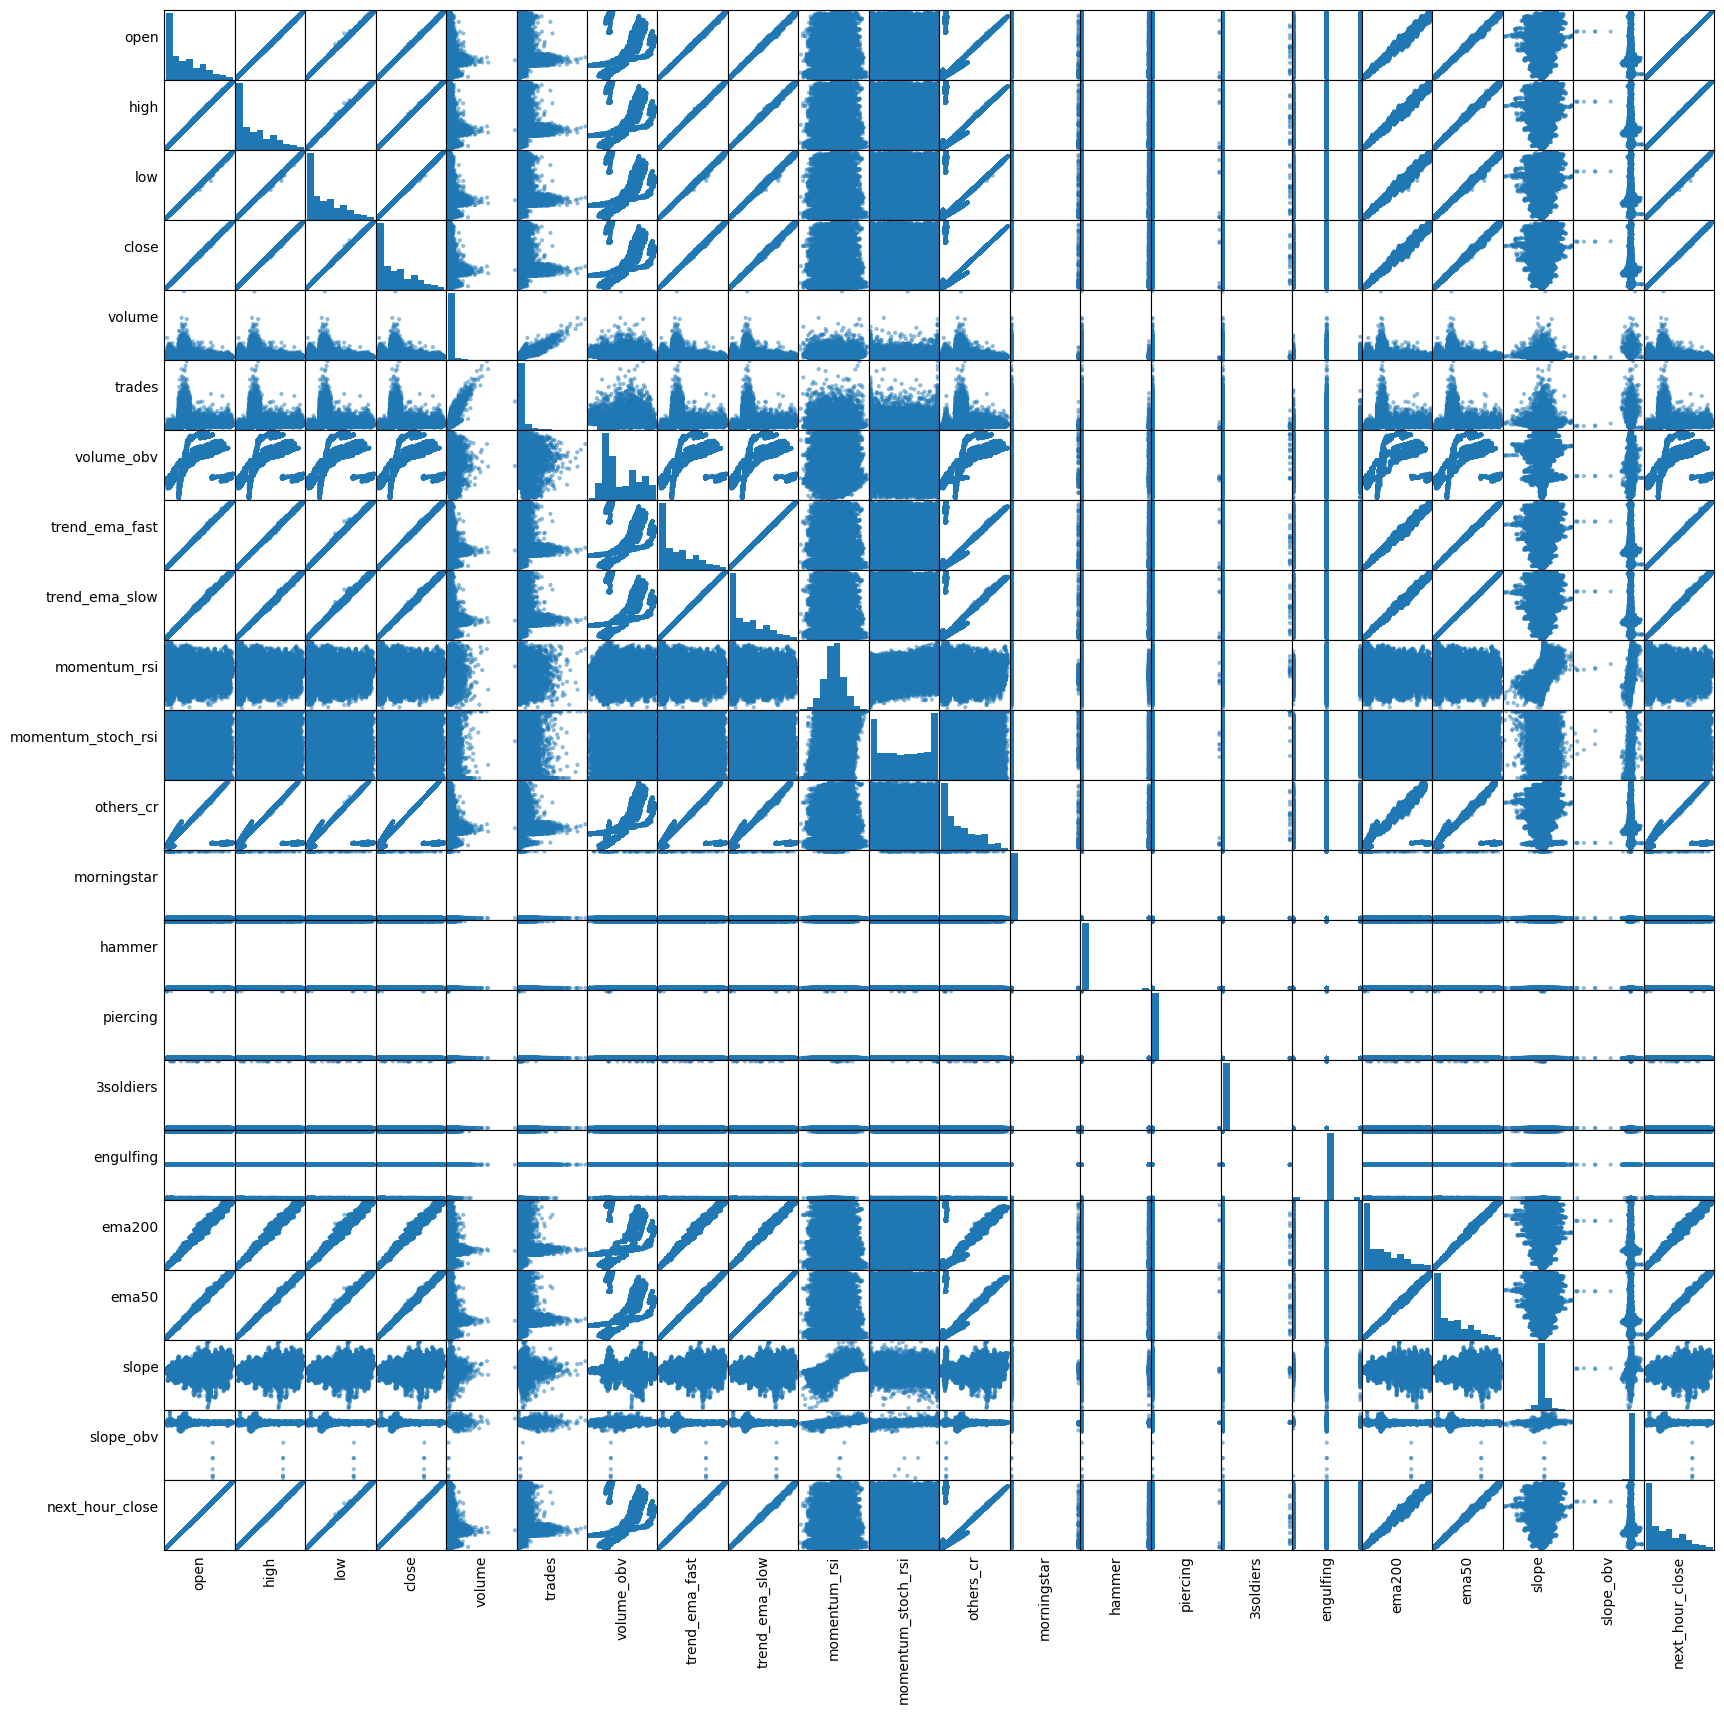

In [203]:
import pandas as pd

# percorrer só os dtypes int e double 
# t é dtypes por cada selecionar só o nome da variável df_customers.dtypes[1][0]
numeric_features = [t[0] for t in df_analysis[features+['next_hour_close']].dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_analysis[features+['next_hour_close']].select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(20, 20))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [206]:
df_analysis = df_btc.filter(df_btc.next_hour_direction == 2)

24/04/27 13:12:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:12:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high

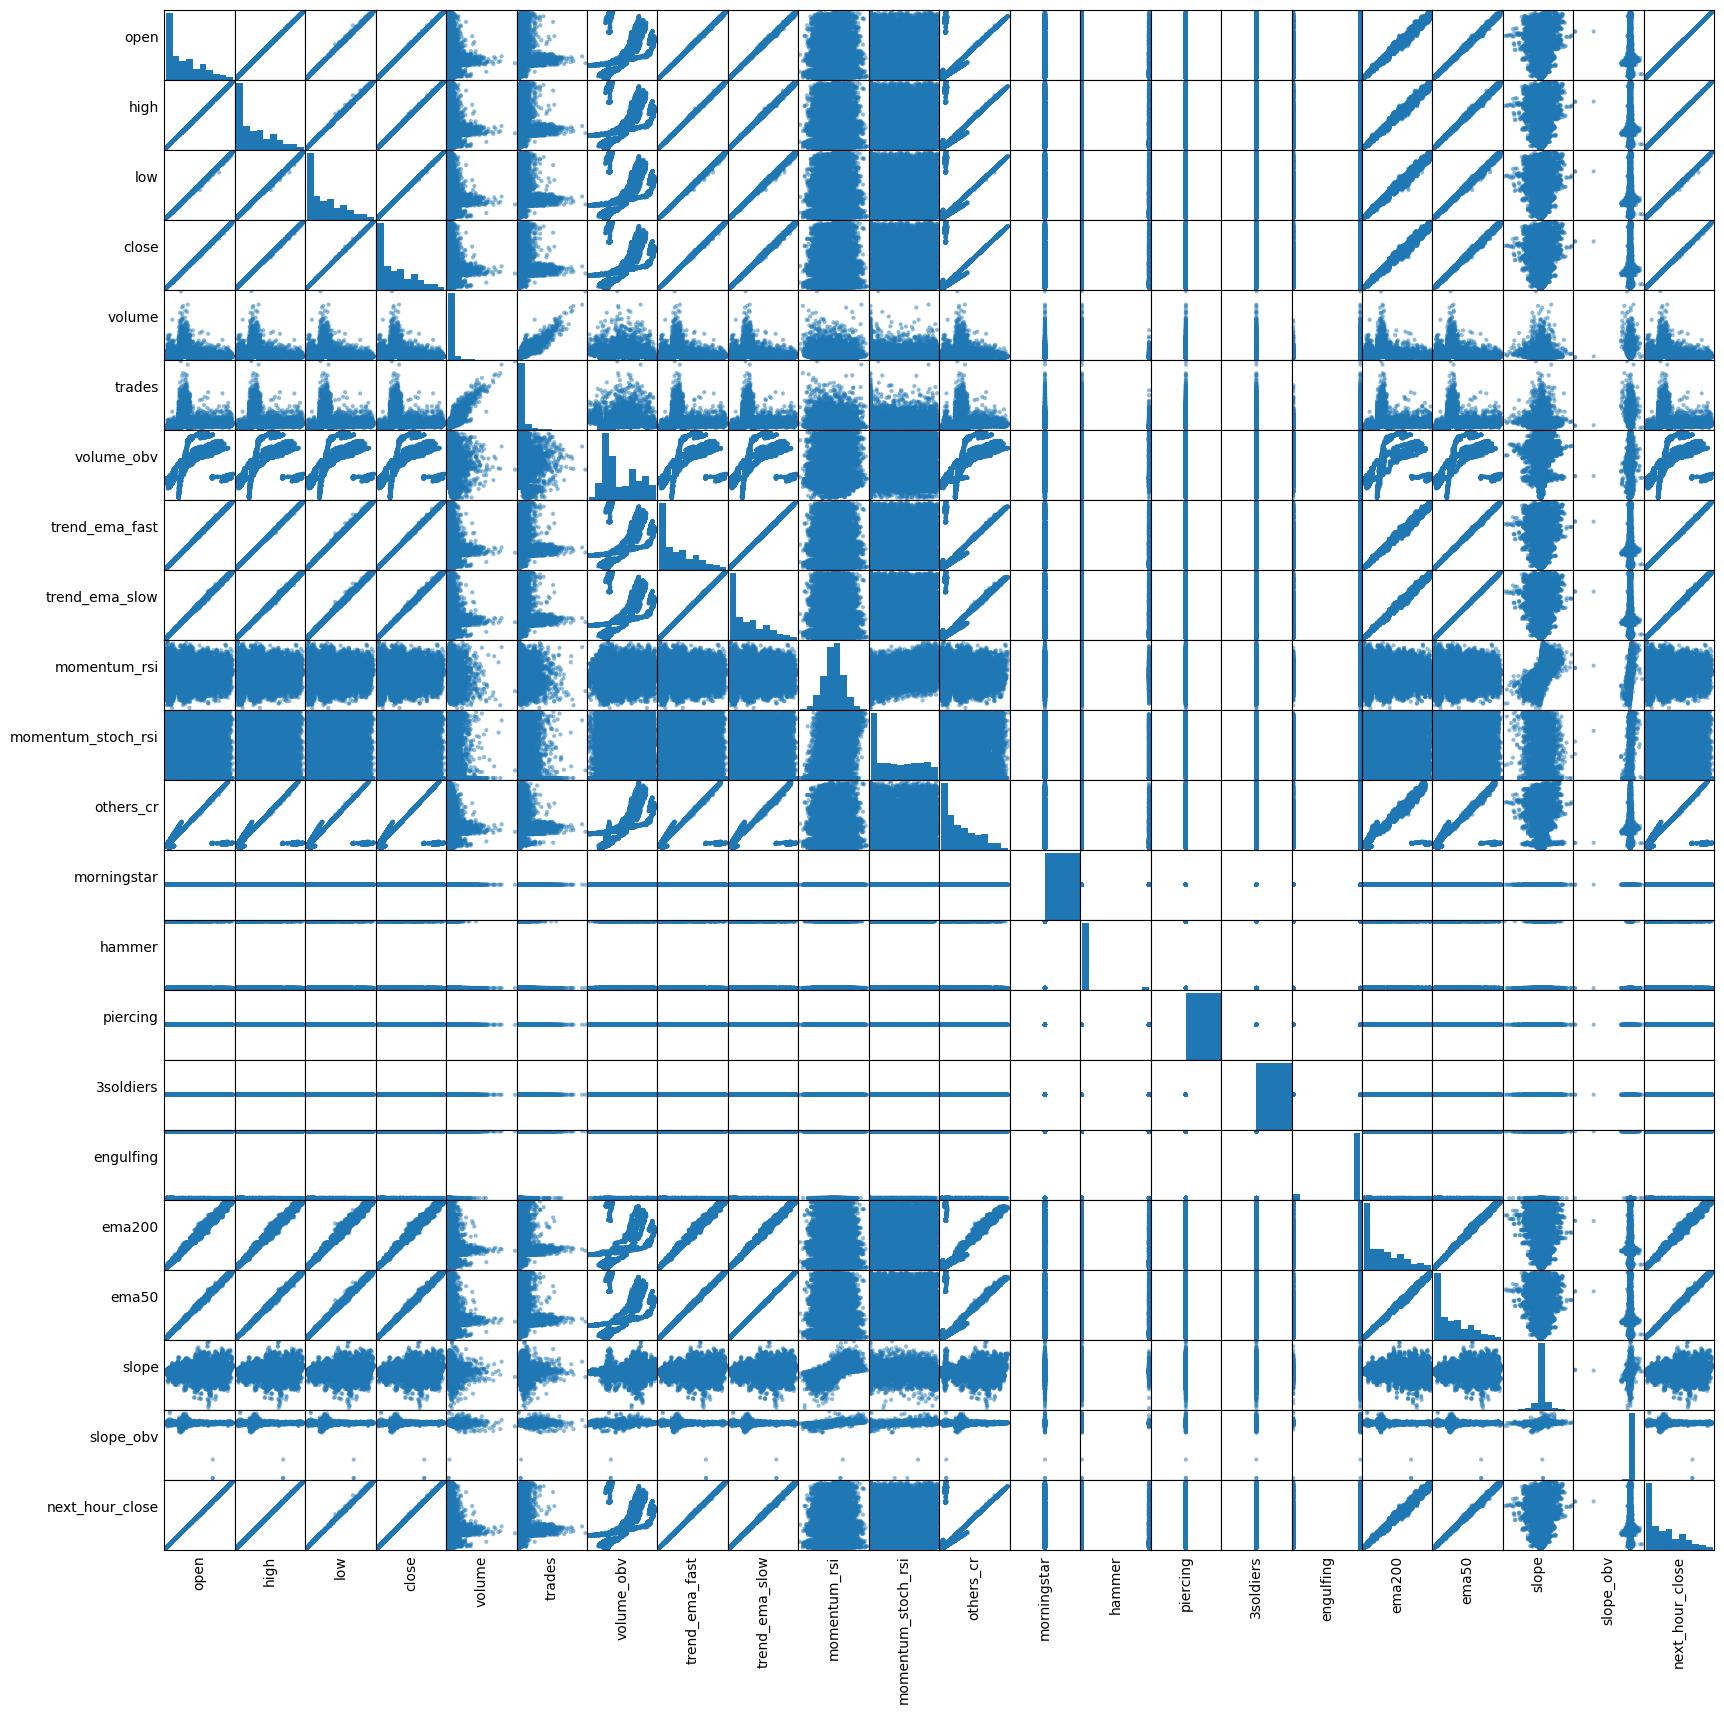

In [207]:
# percorrer só os dtypes int e double 
# t é dtypes por cada selecionar só o nome da variável df_customers.dtypes[1][0]
numeric_features = [t[0] for t in df_analysis[features+['next_hour_close']].dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_analysis[features+['next_hour_close']].select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(20, 20))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [208]:
df_analysis = df_btc.filter(df_btc.next_hour_direction == 1)

24/04/27 13:14:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:14:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


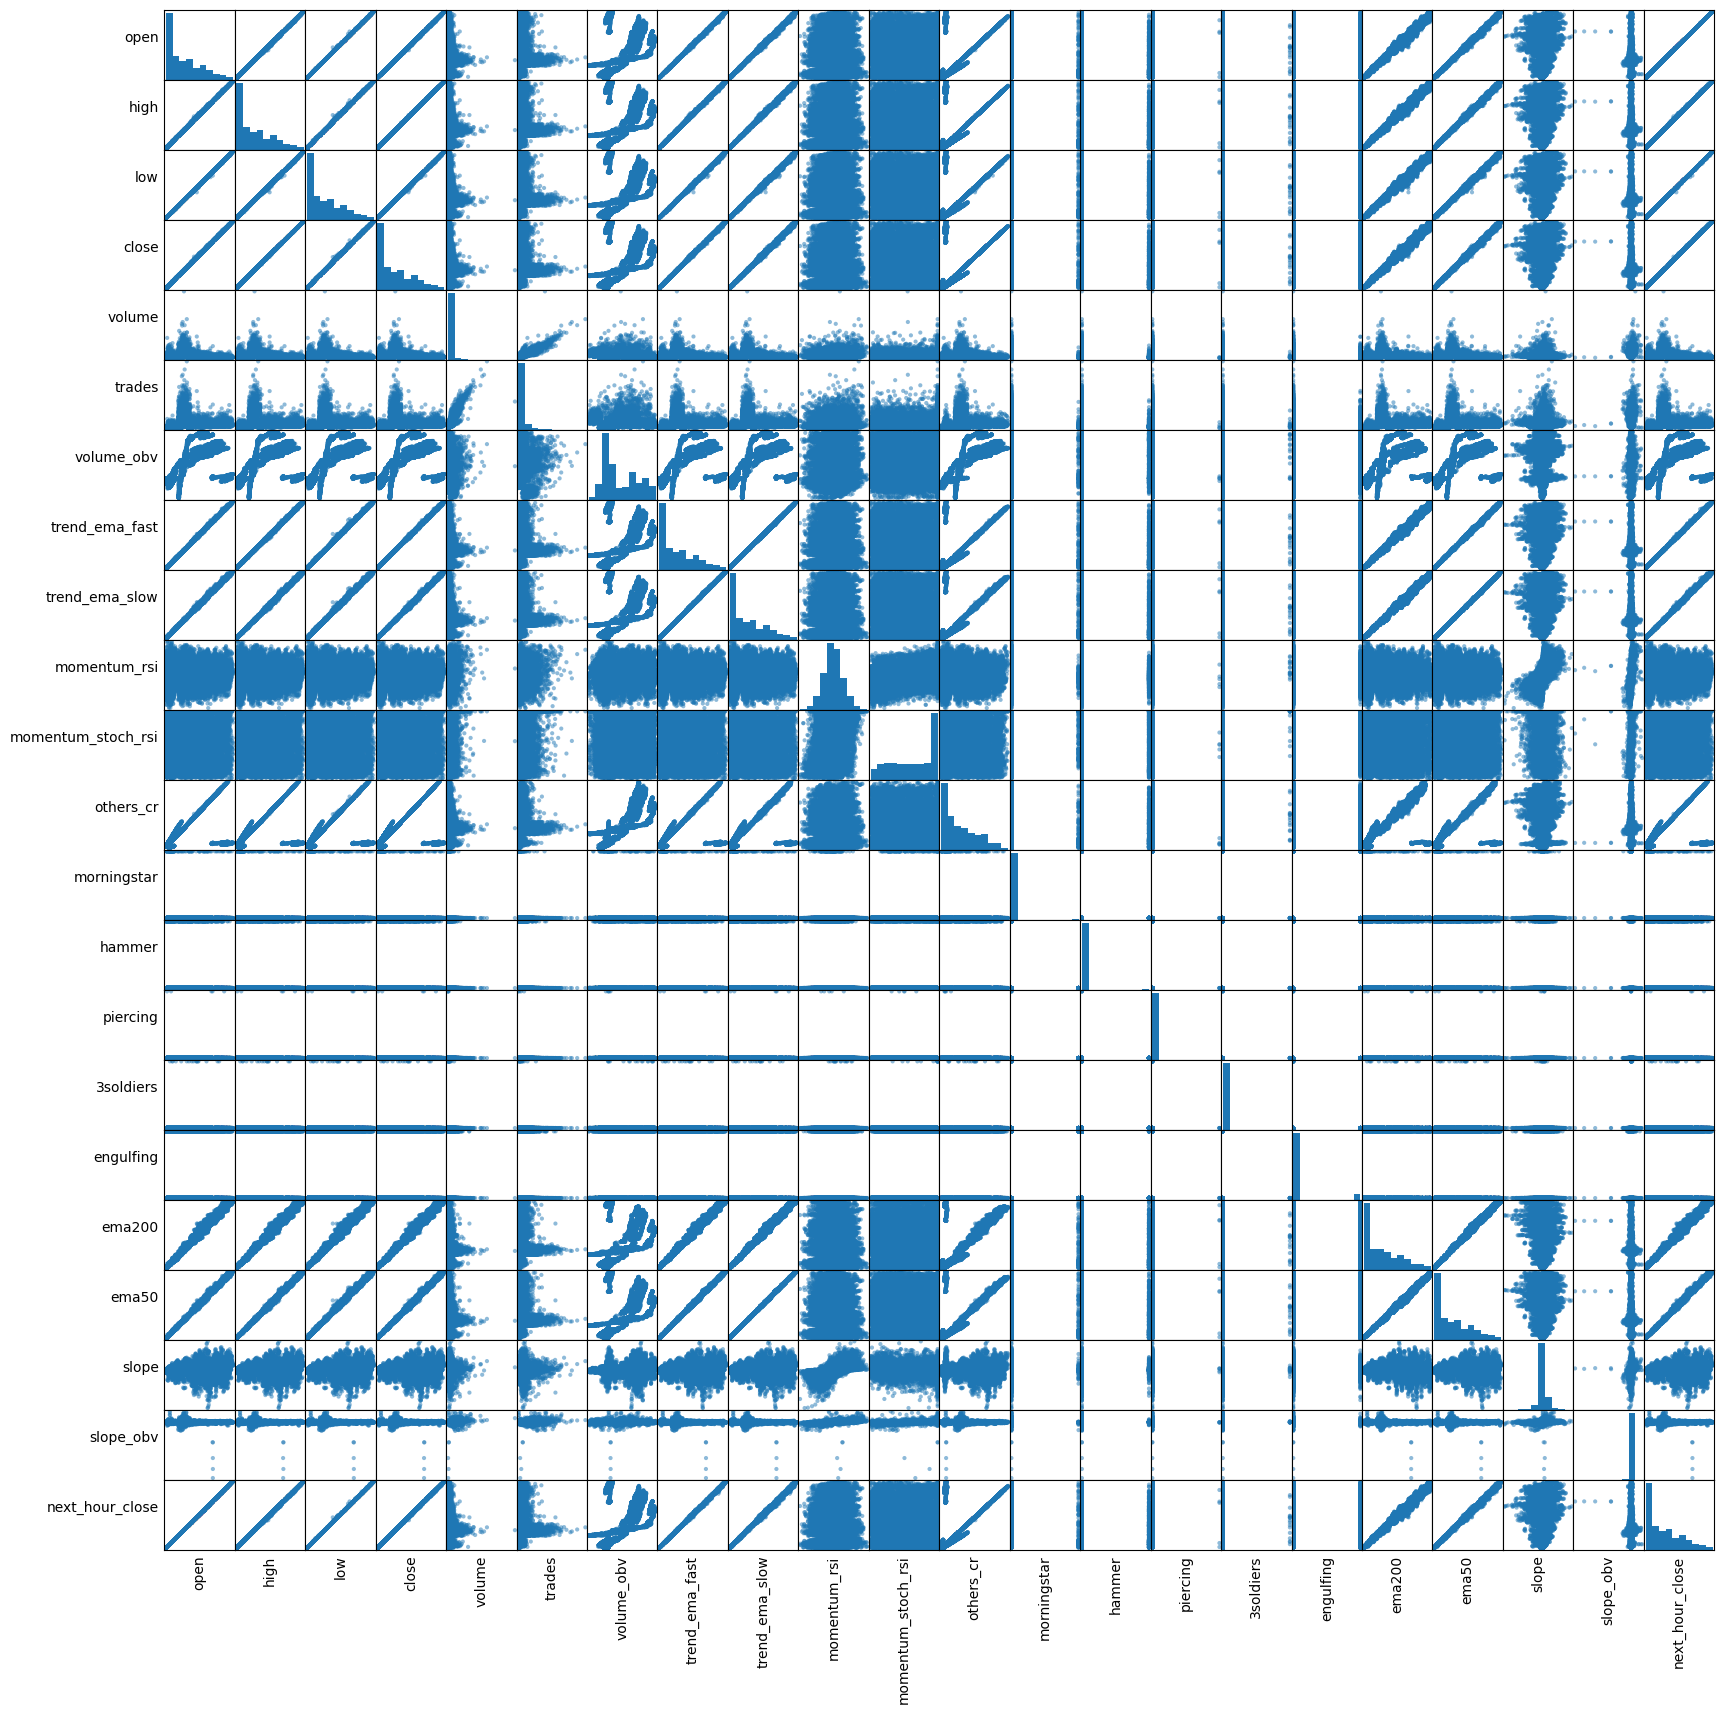

In [209]:
# percorrer só os dtypes int e double 
# t é dtypes por cada selecionar só o nome da variável df_customers.dtypes[1][0]
numeric_features = [t[0] for t in df_analysis[features+['next_hour_close']].dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_analysis[features+['next_hour_close']].select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(20, 20))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [210]:
df_btc[features+['next_hour_close','next_hour_direction']].show()

+-------------------+-------+-------+-------+-------+---------+------+----------------+----------------+--------------+----------------+------------------+------------------+-----------+------+--------+---------+---------+------------------+------------------+-------------------+-------------------+---------------+-------------------+
|          open_time|   open|   high|    low|  close|   volume|trades|      volume_obv|  trend_ema_fast|trend_ema_slow|    momentum_rsi|momentum_stoch_rsi|         others_cr|morningstar|hammer|piercing|3soldiers|engulfing|            ema200|             ema50|              slope|          slope_obv|next_hour_close|next_hour_direction|
+-------------------+-------+-------+-------+-------+---------+------+----------------+----------------+--------------+----------------+------------------+------------------+-----------+------+--------+---------+---------+------------------+------------------+-------------------+-------------------+---------------+----------

24/04/27 13:15:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:15:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [ ]:
#df_btc.write.csv('./data/btc1h_usdt_features.csv',header=True)

Criar slope obv e slope: up, down, flat



In [162]:
#df_btc = df_btc.withColumn("slope_obv_change", df_btc.next_hour_close - df_btc.close)
#df_btc = df_btc.withColumn("slope_dir", 
#                           when(df_btc.price_change > 0, "up")
#                           .when(df_btc.price_change < 0, "down")
#                           .otherwise("flat")) 

In [211]:
features[1:]

['open',
 'high',
 'low',
 'close',
 'volume',
 'trades',
 'volume_obv',
 'trend_ema_fast',
 'trend_ema_slow',
 'momentum_rsi',
 'momentum_stoch_rsi',
 'others_cr',
 'morningstar',
 'hammer',
 'piercing',
 '3soldiers',
 'engulfing',
 'ema200',
 'ema50',
 'slope',
 'slope_obv']

In [212]:
# Suppress globally (use with caution)
df_btc_pd = df_btc.toPandas()

for col in features[1:]:
    print( "Correlation between next_hour_close and ", col, df_btc.stat.corr('next_hour_close',col))

24/04/27 13:19:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  open 0.9999991014344879
Correlation between next_hour_close and  high 0.999956438991404
Correlation between next_hour_close and  low 0.9999366669184091


24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  close 0.9999266110292151
Correlation between next_hour_close and  volume 0.025856068761825075
Correlation between next_hour_close and  trades 0.2237056007278689


24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  volume_obv 0.6912373860865059
Correlation between next_hour_close and  trend_ema_fast 0.9998666502212367
Correlation between next_hour_close and  trend_ema_slow 0.9996322608233099


24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  momentum_rsi 0.021514515072856018
Correlation between next_hour_close and  momentum_stoch_rsi -0.009469833361679095


24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  others_cr 0.8335971846828936
Correlation between next_hour_close and  morningstar -0.0005515481018170615


24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  hammer -0.003974111603213103
Correlation between next_hour_close and  piercing 0.0025469958406719654


24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  3soldiers 0.006668891438690462
Correlation between next_hour_close and  engulfing 0.001465032670039654
Correlation between next_hour_close and  ema200 0.9966615424187756


24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Correlation between next_hour_close and  ema50 0.999249513378622
Correlation between next_hour_close and  slope 0.06870612476394401
Correlation between next_hour_close and  slope_obv -0.013421881162647377


24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [213]:
df_btc.columns

['_c0',
 'open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_vol',
 'trades',
 'taker_buy_base',
 'taker_buy_quote',
 'ignore',
 'symbol',
 'volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_vwap',
 'volume_mfi',
 'volume_nvi',
 'volatility_bbm',
 'volatility_bbh',
 'volatility_bbl',
 'volatility_bbw',
 'volatility_bbp',
 'volatility_bbhi',
 'volatility_bbli',
 'volatility_kcc',
 'volatility_kch',
 'volatility_kcl',
 'volatility_kcw',
 'volatility_kcp',
 'volatility_kchi',
 'volatility_kcli',
 'volatility_dcl',
 'volatility_dch',
 'volatility_dcm',
 'volatility_dcw',
 'volatility_dcp',
 'volatility_atr',
 'volatility_ui',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'trend_sma_fast',
 'trend_sma_slow',
 'trend_ema_fast',
 'trend_ema_slow',
 'trend_vortex_ind_pos',
 'trend_vortex_ind_neg',
 'trend_vortex_ind_diff',
 'trend_trix',
 'trend_mass_index',
 'trend_dpo',
 'trend_kst',
 't

In [214]:
df_btc_pd.select_dtypes(include='number').columns

Index(['_c0', 'open', 'high', 'low', 'close', 'volume', 'quote_vol', 'trades',
       'taker_buy_base', 'taker_buy_quote',
       ...
       'sma200', 'sma50', 'ema200', 'ema50', 'slope', 'slope_obv',
       'next_hour_close', 'year', 'price_change', 'next_hour_direction'],
      dtype='object', length=112)

In [215]:
for col in df_btc_pd.select_dtypes(include='number').columns[1:]:
    print(f"Correlation between next_hour_close and {col}", df_btc_pd['next_hour_close'].corr(df_btc_pd[col]))

Correlation between next_hour_close and open 0.9999996118009244
Correlation between next_hour_close and high 0.9999569554022218
Correlation between next_hour_close and low 0.9999371815239065
Correlation between next_hour_close and close 0.999927130968937
Correlation between next_hour_close and volume 0.025841182492959667
Correlation between next_hour_close and quote_vol 0.3700847619035243
Correlation between next_hour_close and trades 0.22369489700250905
Correlation between next_hour_close and taker_buy_base 0.022299222497316137
Correlation between next_hour_close and taker_buy_quote 0.36662466288570694
Correlation between next_hour_close and ignore nan
Correlation between next_hour_close and volume_adi 0.5873778909051096
Correlation between next_hour_close and volume_obv 0.6912341796751521
Correlation between next_hour_close and volume_cmf -0.00963230413220289
Correlation between next_hour_close and volume_fi -0.014316573904695389
Correlation between next_hour_close and volume_em -0.0

/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Implementar o algoritmo

In [216]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

In [217]:
df_btc.count()

24/04/27 13:19:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


58534

In [218]:
# eliminar nulls
df_btc = df_btc.dropna(subset=features)

In [219]:
df_btc.count()

24/04/27 13:19:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:19:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


58508

In [220]:
features

['open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'trades',
 'volume_obv',
 'trend_ema_fast',
 'trend_ema_slow',
 'momentum_rsi',
 'momentum_stoch_rsi',
 'others_cr',
 'morningstar',
 'hammer',
 'piercing',
 '3soldiers',
 'engulfing',
 'ema200',
 'ema50',
 'slope',
 'slope_obv']

In [221]:
# Prepare the features and label columns
feature_cols = features[1:]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df_btc).select("features", "next_hour_direction")


In [222]:
feature_cols

['open',
 'high',
 'low',
 'close',
 'volume',
 'trades',
 'volume_obv',
 'trend_ema_fast',
 'trend_ema_slow',
 'momentum_rsi',
 'momentum_stoch_rsi',
 'others_cr',
 'morningstar',
 'hammer',
 'piercing',
 '3soldiers',
 'engulfing',
 'ema200',
 'ema50',
 'slope',
 'slope_obv']

In [223]:
# vamos visualizar o conteúdo com vector assembler
# transform para criar um dataframe e aplicarmos o show
from pyspark.sql.functions import col
out=assembler.transform(df_btc[feature_cols+['next_hour_direction']])

out.select(["features","next_hour_direction"]).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+
|features                                                                                                                                                                                                                                                 |next_hour_direction|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+
|[4313.56,4316.98,4247.75,4279.46,64.235424,298.0,123.329811,4300.82144852918,4317.3452159225,44.04557484998,0.60467971414758,-0.68162354978033,0.0,0.0,0.0,0.0,0.0,4315.5770447455925,4

24/04/27 13:31:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:31:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [224]:
# Split data
train, test = out.randomSplit([0.7, 0.3],seed=123)

In [225]:
train.show(truncate=20)

24/04/27 13:31:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:31:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+-------+-------+-------+-----------+-------+-------------------+------------------+------------------+------------------+------------------+-------------------+-----------+------+--------+---------+---------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+
|   open|   high|    low|  close|     volume| trades|         volume_obv|    trend_ema_fast|    trend_ema_slow|      momentum_rsi|momentum_stoch_rsi|          others_cr|morningstar|hammer|piercing|3soldiers|engulfing|            ema200|             ema50|              slope|          slope_obv|next_hour_direction|            features|
+-------+-------+-------+-------+-----------+-------+-------------------+------------------+------------------+------------------+------------------+-------------------+-----------+------+--------+---------+---------+------------------+------------------+-------------------+-------------------+-------------------+-----------

In [226]:
train.describe().show(truncate=20)

24/04/27 13:31:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:31:18 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+
|summary|              open|              high|               low|             close|            volume|           trades|        volume_obv|   trend_ema_fast|    trend_ema_slow|      momentum_rsi| momentum_stoch_rsi|         others_cr|        morningstar|            hammer|            piercing|          3soldiers|          engulfing|            ema200|             ema50|              slope|          slope_obv|next_hour_direction|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+--------

In [231]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier 

rf = RandomForestClassifier(labelCol="next_hour_direction", featuresCol="features")
rf_model = rf.fit(train)
predictions = rf_model.transform(test)

predictions_df = predictions.select("close", "next_hour_direction", "prediction")  


evaluator = MulticlassClassificationEvaluator(labelCol="next_hour_direction", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

predictions_df = predictions.select("close", "next_hour_direction", "prediction")
predictions_df.show()

24/04/27 13:39:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:39:21 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


Accuracy: 0.6844243792325057


24/04/27 13:39:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:39:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+-------------------+----------+
|  close|next_hour_direction|prediction|
+-------+-------------------+----------+
| 2919.0|                  2|       2.0|
| 3189.0|                  1|       2.0|
| 3206.0|                  1|       1.0|
|3318.99|                  1|       1.0|
|3185.94|                  2|       2.0|
|3198.39|                  2|       2.0|
|3256.73|                  1|       1.0|
| 3235.9|                  1|       1.0|
|3243.78|                  1|       1.0|
|3242.65|                  1|       1.0|
|3228.67|                  2|       1.0|
|3192.28|                  2|       2.0|
|3241.86|                  1|       1.0|
|3225.66|                  2|       1.0|
|3224.17|                  2|       2.0|
|3230.93|                  2|       1.0|
|3260.45|                  1|       1.0|
|3230.84|                  2|       2.0|
|3258.62|                  1|       1.0|
|3249.61|                  2|       1.0|
+-------+-------------------+----------+
only showing top

In [232]:
evaluator = MulticlassClassificationEvaluator(labelCol="next_hour_direction", predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(predictions)
print("F1 Score:", f1)

evaluator.setMetricName("weightedPrecision")
weighted_precision = evaluator.evaluate(predictions)
print("Weighted Precision:", weighted_precision)

evaluator.setMetricName("weightedRecall")
weighted_recall = evaluator.evaluate(predictions)
print("Weighted Recall:", weighted_recall)


F1 Score: 0.6815016823268871
Weighted Precision: 0.6881596250276518
Weighted Recall: 0.6844243792325057


In [ ]:
predictions.show(truncate=30)

24/04/27 13:43:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:43:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------+-------+-------+-------+-----------+-------+-------------------+------------------+------------------+------------------+------------------+-------------------+-----------+------+--------+---------+---------+------------------+------------------+--------------------+-------------------+-------------------+------------------------------+------------------------------+------------------------------+----------+
|   open|   high|    low|  close|     volume| trades|         volume_obv|    trend_ema_fast|    trend_ema_slow|      momentum_rsi|momentum_stoch_rsi|          others_cr|morningstar|hammer|piercing|3soldiers|engulfing|            ema200|             ema50|               slope|          slope_obv|next_hour_direction|                      features|                 rawPrediction|                   probability|prediction|
+-------+-------+-------+-------+-----------+-------+-------------------+------------------+------------------+------------------+------------------+---------

In [241]:
predictions.printSchema()

root
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- trades: double (nullable = true)
 |-- volume_obv: double (nullable = true)
 |-- trend_ema_fast: double (nullable = true)
 |-- trend_ema_slow: double (nullable = true)
 |-- momentum_rsi: double (nullable = true)
 |-- momentum_stoch_rsi: double (nullable = true)
 |-- others_cr: double (nullable = true)
 |-- morningstar: integer (nullable = true)
 |-- hammer: integer (nullable = true)
 |-- piercing: integer (nullable = true)
 |-- 3soldiers: integer (nullable = true)
 |-- engulfing: integer (nullable = true)
 |-- ema200: double (nullable = true)
 |-- ema50: double (nullable = true)
 |-- slope: double (nullable = true)
 |-- slope_obv: double (nullable = true)
 |-- next_hour_direction: integer (nullable = false)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- pr

In [243]:
df_btc = df_btc.withColumn("prediction2", col("prediction").cast("int"))

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `prediction` cannot be resolved. Did you mean one of the following? [`trend_cci`, `piercing`, `trend_dpo`, `trend_stc`, `trend_trix`].;
'Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 92 more fields]
+- Filter atleastnnonnulls(22, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, trades#545199, volume_obv#545205, trend_ema_fast#545240, trend_ema_slow#545241, momentum_rsi#545269, momentum_stoch_rsi#545270, others_cr#545286, morningstar#545287, hammer#545288, piercing#545289, 3soldiers#545290, engulfing#545291, ema200#545297, ema50#545298, slope#545299, slope_obv#545300)
   +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 91 more fields]
      +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 90 more fields]
         +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 89 more fields]
            +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 88 more fields]
               +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 89 more fields]
                  +- Window [lag(close#545195, -1, null) windowspecdefinition(open_time#545191 ASC NULLS FIRST, specifiedwindowframe(RowFrame, -1, -1)) AS next_hour_close#545750], [open_time#545191 ASC NULLS FIRST]
                     +- Project [_c0#545190, open_time#545191, open#545192, high#545193, low#545194, close#545195, volume#545196, close_time#545197, quote_vol#545198, trades#545199, taker_buy_base#545200, taker_buy_quote#545201, ignore#545202, symbol#545203, volume_adi#545204, volume_obv#545205, volume_cmf#545206, volume_fi#545207, volume_em#545208, volume_sma_em#545209, volume_vpt#545210, volume_vwap#545211, volume_mfi#545212, volume_nvi#545213, ... 87 more fields]
                        +- Relation [_c0#545190,open_time#545191,open#545192,high#545193,low#545194,close#545195,volume#545196,close_time#545197,quote_vol#545198,trades#545199,taker_buy_base#545200,taker_buy_quote#545201,ignore#545202,symbol#545203,volume_adi#545204,volume_obv#545205,volume_cmf#545206,volume_fi#545207,volume_em#545208,volume_sma_em#545209,volume_vpt#545210,volume_vwap#545211,volume_mfi#545212,volume_nvi#545213,... 87 more fields] csv


In [236]:
metrics.confusionMatrix()

24/04/27 13:41:27 ERROR Executor: Exception in task 0.0 in stage 674.0 (TID 592)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/env

Py4JJavaError: An error occurred while calling o4359.confusionMatrix.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 674.0 failed 1 times, most recent failure: Lost task 0.0 in stage 674.0 (TID 592) (10.255.255.254 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/session.py", line 1459, in prepare
    verify_func(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2160, in verify_struct
    verifier(v)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2181, in verify_default
    verify_acceptable_types(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2006, in verify_acceptable_types
    raise PySparkTypeError(
pyspark.errors.exceptions.base.PySparkTypeError: [CANNOT_ACCEPT_OBJECT_IN_TYPE] `DoubleType()` can not accept object `2` in type `int`.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:197)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$collectAsMap$1(PairRDDFunctions.scala:738)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:737)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions$lzycompute(MulticlassMetrics.scala:61)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions(MulticlassMetrics.scala:52)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass$lzycompute(MulticlassMetrics.scala:78)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass(MulticlassMetrics.scala:76)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labels$lzycompute(MulticlassMetrics.scala:241)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labels(MulticlassMetrics.scala:241)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusionMatrix(MulticlassMetrics.scala:113)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/session.py", line 1459, in prepare
    verify_func(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2160, in verify_struct
    verifier(v)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2181, in verify_default
    verify_acceptable_types(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2006, in verify_acceptable_types
    raise PySparkTypeError(
pyspark.errors.exceptions.base.PySparkTypeError: [CANNOT_ACCEPT_OBJECT_IN_TYPE] `DoubleType()` can not accept object `2` in type `int`.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:197)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [233]:
from pyspark.mllib.evaluation import MulticlassMetrics

prediction_and_labels = predictions.select("prediction", "next_hour_direction").rdd
metrics = MulticlassMetrics(prediction_and_labels)

print("Confusion Matrix:\n", metrics.confusionMatrix().toArray())


/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
24/04/27 13:40:18 ERROR Executor: Exception in task 0.0 in stage 668.0 (TID 590)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/

Py4JJavaError: An error occurred while calling o4359.confusionMatrix.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 668.0 failed 1 times, most recent failure: Lost task 0.0 in stage 668.0 (TID 590) (10.255.255.254 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/session.py", line 1459, in prepare
    verify_func(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2160, in verify_struct
    verifier(v)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2181, in verify_default
    verify_acceptable_types(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2006, in verify_acceptable_types
    raise PySparkTypeError(
pyspark.errors.exceptions.base.PySparkTypeError: [CANNOT_ACCEPT_OBJECT_IN_TYPE] `DoubleType()` can not accept object `2` in type `int`.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:197)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$collectAsMap$1(PairRDDFunctions.scala:738)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.PairRDDFunctions.collectAsMap(PairRDDFunctions.scala:737)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions$lzycompute(MulticlassMetrics.scala:61)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusions(MulticlassMetrics.scala:52)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass$lzycompute(MulticlassMetrics.scala:78)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.tpByClass(MulticlassMetrics.scala:76)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labels$lzycompute(MulticlassMetrics.scala:241)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.labels(MulticlassMetrics.scala:241)
	at org.apache.spark.mllib.evaluation.MulticlassMetrics.confusionMatrix(MulticlassMetrics.scala:113)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/session.py", line 1459, in prepare
    verify_func(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2160, in verify_struct
    verifier(v)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2187, in verify
    verify_value(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2181, in verify_default
    verify_acceptable_types(obj)
  File "/home/sobreiro/anaconda3/envs/spark/lib/python3.12/site-packages/pyspark/sql/types.py", line 2006, in verify_acceptable_types
    raise PySparkTypeError(
pyspark.errors.exceptions.base.PySparkTypeError: [CANNOT_ACCEPT_OBJECT_IN_TYPE] `DoubleType()` can not accept object `2` in type `int`.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.util.collection.ExternalSorter.insertAll(ExternalSorter.scala:197)
	at org.apache.spark.shuffle.sort.SortShuffleWriter.write(SortShuffleWriter.scala:63)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [228]:
# Train model
from pyspark.ml.classification import RandomForestClassifier 

rf = RandomForestClassifier(labelCol="next_hour_direction", featuresCol="features")
rf_model = rf.fit(train)
print("Coefficients: " + str(rf_model.coefficients))
print("Intercept: " + str(rf_model.intercept))

24/04/27 13:31:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 13:31:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


AttributeError: 'RandomForestClassificationModel' object has no attribute 'coefficients'

In [136]:
predictions = rf_model.transform(test)
predictions.select("next_hour_direction", "prediction").show()

NameError: name 'rf_model' is not defined

Sumarizar o modelo

In [19]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 96.033224
r2: 0.680174


R squared at 0.68 indicates that in our model, approximate 68% of the variability in “tbilled” can be explained using the model

## visualization

In [ ]:
from graphviz import Digraph

# Decision Tree Regression

In [249]:
df_btc[features+['next_hour_close']].show()

+-------------------+-------+-------+-------+-------+---------+------+-----------------+----------------+----------------+----------------+------------------+------------------+-----------+------+--------+---------+---------+------------------+------------------+--------------------+-------------------+---------------+
|          open_time|   open|   high|    low|  close|   volume|trades|       volume_obv|  trend_ema_fast|  trend_ema_slow|    momentum_rsi|momentum_stoch_rsi|         others_cr|morningstar|hammer|piercing|3soldiers|engulfing|            ema200|             ema50|               slope|          slope_obv|next_hour_close|
+-------------------+-------+-------+-------+-------+---------+------+-----------------+----------------+----------------+----------------+------------------+------------------+-----------+------+--------+---------+---------+------------------+------------------+--------------------+-------------------+---------------+
|2017-08-18 06:00:00|4313.56|4316.98|

24/04/27 15:18:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 15:18:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [251]:
out=assembler.transform(df_btc[feature_cols+['next_hour_close']])

out.select(["features","next_hour_close"]).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|features                                                                                                                                                                                                                                                 |next_hour_close|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|[4313.56,4316.98,4247.75,4279.46,64.235424,298.0,123.329811,4300.82144852918,4317.3452159225,44.04557484998,0.60467971414758,-0.68162354978033,0.0,0.0,0.0,0.0,0.0,4315.5770447455925,4322.00370359

24/04/27 15:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 15:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [252]:
# Split data
train, test = out.randomSplit([0.7, 0.3],seed=123)

In [253]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

rfr = RandomForestClassifier(labelCol="next_hour_close", featuresCol="features")
rfr_model = rfr.fit(train)
predictions = rfr_model.transform(test)

predictions_df = predictions.select("close", "next_hour_direction", "prediction")  




24/04/27 15:23:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 15:23:57 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/27 15:23:57 ERROR Executor: Exception in task 0.0 in stage 689.0 (TID 599)
java.lang.RuntimeException: Labels MUST be in [0, 100), but got 2919.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_1$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_d

Py4JJavaError: An error occurred while calling o4689.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 689.0 failed 1 times, most recent failure: Lost task 0.0 in stage 689.0 (TID 599) (10.255.255.254 executor driver): java.lang.RuntimeException: Labels MUST be in [0, 100), but got 2919.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_1$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:418)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.ml.util.DatasetUtils$.getNumClasses(DatasetUtils.scala:193)
	at org.apache.spark.ml.classification.Classifier.getNumClasses(Classifier.scala:75)
	at org.apache.spark.ml.classification.RandomForestClassifier.$anonfun$train$1(RandomForestClassifier.scala:144)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.RandomForestClassifier.train(RandomForestClassifier.scala:139)
	at org.apache.spark.ml.classification.RandomForestClassifier.train(RandomForestClassifier.scala:47)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:78)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.RuntimeException: Labels MUST be in [0, 100), but got 2919.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregate_max_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_1$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:893)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:893)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="next_hour_direction", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

predictions_df = predictions.select("close", "next_hour_direction", "prediction")
predictions_df.show()

In [250]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

dt_rfr = DecisionTreeRegressor(featuresCol ='features', labelCol = 'next_hour_close')
dt_rfr_model = dt_rfr.fit(train)
dt_rfr_predictions = dt_rfr_model.transform(test)
#dt_evaluator = RegressionEvaluator(labelCol="featured", predictionCol="tbilled", metricName="rmse")
#rmse = dt_evaluator.evaluate(dt_predictions)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

IllegalArgumentException: next_hour_close does not exist. Available: open, high, low, close, volume, trades, volume_obv, trend_ema_fast, trend_ema_slow, momentum_rsi, momentum_stoch_rsi, others_cr, morningstar, hammer, piercing, 3soldiers, engulfing, ema200, ema50, slope, slope_obv, next_hour_direction, features

Variáveis mais importantes

In [65]:
dt_model.featureImportances

SparseVector(10, {0: 0.0923, 2: 0.0201, 3: 0.0149, 5: 0.6013, 6: 0.0016, 7: 0.0032, 8: 0.2667})

In [69]:
feature_cols

['age',
 'sex',
 'dayswfreq',
 'maccess',
 'freeuse',
 'nentries',
 'cfreq',
 'nrenewals',
 'months',
 'dropout']

Mais importante nentries e nrenewals

Arvore de decisão

In [73]:
print(dt_model.toDebugString)

DecisionTreeRegressionModel: uid=DecisionTreeRegressor_26000365f7aa, depth=5, numNodes=63, numFeatures=10
  If (feature 5 <= 59.5)
   If (feature 8 <= 12.5)
    If (feature 5 <= 14.5)
     If (feature 0 <= 28.5)
      If (feature 5 <= 7.5)
       Predict: 55.672444733420065
      Else (feature 5 > 7.5)
       Predict: 79.03471074380165
     Else (feature 0 > 28.5)
      If (feature 8 <= 3.5)
       Predict: 74.94712446351936
      Else (feature 8 > 3.5)
       Predict: 119.21971291866029
    Else (feature 5 > 14.5)
     If (feature 8 <= 6.5)
      If (feature 0 <= 29.5)
       Predict: 98.90115942028984
      Else (feature 0 > 29.5)
       Predict: 127.56735537190077
     Else (feature 8 > 6.5)
      If (feature 0 <= 32.5)
       Predict: 149.61806818181824
      Else (feature 0 > 32.5)
       Predict: 247.22663265306144
   Else (feature 8 > 12.5)
    If (feature 0 <= 28.5)
     If (feature 5 <= 19.5)
      If (feature 5 <= 5.5)
       Predict: 80.07142857142857
      Else (feature 5 >

In [74]:
# Stop the SparkSession
spark.stop()